In [ ]:
#Import data from the CSV file

In [51]:
from decimal import Decimal
from decimal import *
import pandas as pd
import numpy as np
import matplotlib
import csv
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  train_test_split

#importar datos del CSV
data=pd.read_csv('C:\\Users\\Esther\\Desktop\\Master\\Modulo 8\\SPAM\\spambasedata.csv', header=None)



In [25]:
# Give shape to the data, separating  the Y column

In [52]:
data.rename(columns={57:'is_spam'}, inplace=True)
ham = data[data['is_spam'] == 0]
spam = data[data['is_spam'] == 1]
nospam = data[data['is_spam'] == 0]
X = data
print (X.shape)

Y = X.pop('is_spam')
print (Y.shape)

(4601, 58)
(4601,)


In [ ]:
############PIE CHAR ###################
# Pie chart, where the slices will be ordered and plotted counter-clockwise:


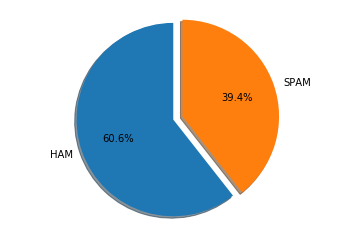

In [27]:
Y0=sum(Y==0)
Y1=sum(Y==1)
labels = 'HAM','SPAM'
sizes = [Y0, Y1]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

In [ ]:
##########################    APPLYING DIFFERENT MODELS     ########################################

In [ ]:
Näive Bayes Gaussian 


In [ ]:

#Divide the datase in  Train(3/5) y test(2/5) stratifying the data in spam and Ham
#Apply  GNB method 
#Do a loop to coach my model with Xtrain and obtain a error media in each iteration comparing it with Ytest and Ypred data


In [28]:
miGNB = GaussianNB()
i = 0
fallos = []
fallostrain = []

for i in range(1,21):
    spam_train, spam_test = train_test_split(spam, train_size=0.6)
    ham_train, ham_test = train_test_split(ham, train_size=0.6)
    Xtrain = ham_train.append(spam_train)
    Ytrain = Xtrain.pop('is_spam')   
    Xtest = ham_test.append(spam_test)
    Ytest = Xtest.pop('is_spam')
#    print (Xtrain.shape)
#    print (Xtest.shape)
#    print(i)
    Ypred=miGNB.fit(Xtrain, Ytrain).predict(Xtest)
    Ypredtrain=miGNB.fit(Xtrain, Ytrain).predict(Xtrain)

    fallos.append(sum(Ypred!=Ytest))
    fallostrain.append(sum(Ypredtrain!=Ytrain))
print (Xtrain.shape)
print (Ytest.shape)    
    
    
print(fallos)
print(fallostrain)

C:\Users\Esther\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(2759, 57)
(1842,)
[321, 348, 312, 334, 319, 339, 351, 352, 342, 340, 338, 352, 359, 340, 320, 346, 367, 353, 318, 325]
[507, 492, 479, 496, 490, 467, 468, 520, 503, 504, 475, 479, 477, 505, 493, 508, 483, 481, 505, 465]


In [ ]:
#Print the results

In [8]:
print ("Num. medio de errores de: " + str(100*np.mean(fallos)/len(Ytest)))
print ("Dev. Std. de errores de: " + str(100*np.std(fallos)/len(Ytest)))

print ("Num. medio de errores de Train: " + str(100*np.mean(fallostrain)/len(Ytrain)))
print ("Dev. Std. de errores de train: " + str(100*np.std(fallostrain)/len(Ytrain)))



Num. medio de errores de: 17.90173724212812
Dev. Std. de errores de: 0.6079074921128192
Num. medio de errores de Train: 17.468285610728525
Dev. Std. de errores de train: 0.5565085582228028


In [ ]:
# Graphic of errors in each iteration
#We calculate the number of failures of each iteration over 100

C:\Users\Esther\Anaconda3\lib\site-packages\matplotlib\legend.py:638: UserWarning: Unrecognized location "down right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


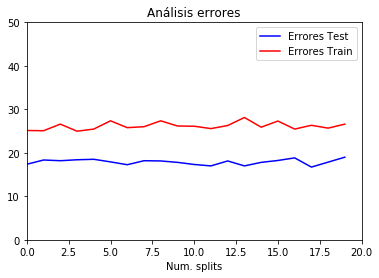

In [9]:
d = Decimal('1.1')
fallos100=np.array([d,d,d,d,d,d,d,d,d,d,d,d,d,d,d,d,d,d,d,d],dtype=np.dtype(Decimal))
for j in range(0,20):
    d=((fallos[j]) * (100)/float(len(Ytest)))
    fallos100[j] = d
#print (fallos100) 

j=0
d = Decimal('1.1')
fallostrain100=np.array([d,d,d,d,d,d,d,d,d,d,d,d,d,d,d,d,d,d,d,d],dtype=np.dtype(Decimal))
for j in range(0,20):
    d=((fallostrain[j]) * (100)/float(len(Ytest)))
    fallostrain100[j] = d
#print (fallostrain100) 

plt.axis([0, 20, 0, 50])
plt.plot(range(0,20),fallos100, 'b-',
         label='Errores Test')
plt.plot(range(0,20), fallostrain100, 'r-',
         label='Errores Train')
plt.legend(loc='down right')
plt.xlabel('Num. splits')
plt.title('Análisis errores')
plt.style.context('seaborn-whitegrid')





In [ ]:

NEURONAL NETWORKS


In [ ]:
MLPClassifier algorithm.
The parameter  “hidden_layers”, represents the number of neurons in the hidden layer.
Using GridSearch to find the better algorithm. 
Establishing 3 hidden layers and varying  the number of neurons from 1 to 10 


In [10]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import  learning_curve
from sklearn.model_selection import GridSearchCV

In [12]:
cls = MLPClassifier( max_iter=100, alpha=1e-4,
                  solver='sgd', verbose=10, tol=1e-4, random_state=1,
                  learning_rate_init=0.01)

mi_param_grid={'hidden_layer_sizes':[(1,1,1),(2,2,2),(3,3,3),(4,4,4),(5,5,5),(6,6,6),(7,7,7),(8,8,8),(9,9,9),(10,10,10)]}
migscv=GridSearchCV(cls,mi_param_grid,cv=10,verbose=2)
migscv.fit(Xtrain,Ytrain)
migscv.best_estimator_


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] hidden_layer_sizes=(1, 1, 1) ....................................
Iteration 1, loss = 0.67242381
Iteration 2, loss = 0.67180648
Iteration 3, loss = 0.67115147
Iteration 4, loss = 0.67081750
Iteration 5, loss = 0.67066625
Iteration 6, loss = 0.67060688
Iteration 7, loss = 0.67057882
Iteration 8, loss = 0.67050357
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV] ..................... hidden_layer_sizes=(1, 1, 1), total=   0.2s
[CV] hidden_layer_sizes=(1, 1, 1) ....................................
Iteration 1, loss = 0.67242381
Iteration 2, loss = 0.67180648
Iteration 3, loss = 0.67115147
Iteration 4, loss = 0.67081750
Iteration 5, loss = 0.67066625
Iteration 6, loss = 0.67060688
Iteration 7, loss = 0.67057882
Iteration 8, loss = 0.67050357
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV] ..................... hidden_layer_sizes=

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


Iteration 2, loss = 0.67183630
Iteration 3, loss = 0.67108682
Iteration 4, loss = 0.67079765
Iteration 5, loss = 0.67060605
Iteration 6, loss = 0.67053642
Iteration 7, loss = 0.67050505
Iteration 8, loss = 0.67053573
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV] ..................... hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] hidden_layer_sizes=(1, 1, 1) ....................................
Iteration 1, loss = 0.67237668
Iteration 2, loss = 0.67183630
Iteration 3, loss = 0.67108682
Iteration 4, loss = 0.67079765
Iteration 5, loss = 0.67060605
Iteration 6, loss = 0.67053642
Iteration 7, loss = 0.67050505
Iteration 8, loss = 0.67053573
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV] ..................... hidden_layer_sizes=(1, 1, 1), total=   0.0s
[CV] hidden_layer_sizes=(1, 1, 1) ....................................
Iteration 1, loss = 0.67237668
Iteration 2, loss = 0.67183630
Iterati

Iteration 11, loss = 0.67060538
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV] ..................... hidden_layer_sizes=(2, 2, 2), total=   0.0s
[CV] hidden_layer_sizes=(2, 2, 2) ....................................
Iteration 1, loss = 0.73500976
Iteration 2, loss = 0.70058533
Iteration 3, loss = 0.68531925
Iteration 4, loss = 0.67666765
Iteration 5, loss = 0.67273976
Iteration 6, loss = 0.67118787
Iteration 7, loss = 0.67054008
Iteration 8, loss = 0.67034115
Iteration 9, loss = 0.67028080
Iteration 10, loss = 0.67023521
Iteration 11, loss = 0.67021208
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV] ..................... hidden_layer_sizes=(2, 2, 2), total=   0.0s
[CV] hidden_layer_sizes=(3, 3, 3) ....................................
Iteration 1, loss = 0.81642339
Iteration 2, loss = 0.69179521
Iteration 3, loss = 0.67488857
Iteration 4, loss = 0.67130843
Iteration 5, loss = 0.67053774
Iter

Iteration 2, loss = 0.68042729
Iteration 3, loss = 0.67668401
Iteration 4, loss = 0.67401759
Iteration 5, loss = 0.67210855
Iteration 6, loss = 0.67138842
Iteration 7, loss = 0.67092304
Iteration 8, loss = 0.67075787
Iteration 9, loss = 0.67063065
Iteration 10, loss = 0.67062779
Iteration 11, loss = 0.67062186
Iteration 12, loss = 0.67061588
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV] ..................... hidden_layer_sizes=(4, 4, 4), total=   0.0s
[CV] hidden_layer_sizes=(4, 4, 4) ....................................
Iteration 1, loss = 1.09285083
Iteration 2, loss = 0.65100505
Iteration 3, loss = 0.64569361
Iteration 4, loss = 0.63966700
Iteration 5, loss = 0.63948711
Iteration 6, loss = 0.63760373
Iteration 7, loss = 0.63711110
Iteration 8, loss = 0.63599168
Iteration 9, loss = 0.63393779
Iteration 10, loss = 0.63202925
Iteration 11, loss = 0.63102418
Iteration 12, loss = 0.62803757
Iteration 13, loss = 0.62502137
Iteration 14, lo

Iteration 13, loss = 0.56767670
Iteration 14, loss = 0.56360777
Iteration 15, loss = 0.56624608
Iteration 16, loss = 0.56541261
Iteration 17, loss = 0.56473068
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV] ..................... hidden_layer_sizes=(5, 5, 5), total=   0.0s
[CV] hidden_layer_sizes=(5, 5, 5) ....................................
Iteration 1, loss = 1.21459549
Iteration 2, loss = 0.67810927
Iteration 3, loss = 0.63112563
Iteration 4, loss = 0.60643369
Iteration 5, loss = 0.59251126
Iteration 6, loss = 0.58559510
Iteration 7, loss = 0.58110649
Iteration 8, loss = 0.58043058
Iteration 9, loss = 0.57736530
Iteration 10, loss = 0.57392619
Iteration 11, loss = 0.59910778
Iteration 12, loss = 0.56996480
Iteration 13, loss = 0.57553450
Iteration 14, loss = 0.56602292
Iteration 15, loss = 0.56451906
Iteration 16, loss = 0.56577562
Iteration 17, loss = 0.56557414
Iteration 18, loss = 0.56239673
Iteration 19, loss = 0.56105304
Iteratio

[CV] ..................... hidden_layer_sizes=(7, 7, 7), total=   0.0s
[CV] hidden_layer_sizes=(7, 7, 7) ....................................
Iteration 1, loss = 0.96580653
Iteration 2, loss = 0.67917510
Iteration 3, loss = 0.67409985
Iteration 4, loss = 0.67191173
Iteration 5, loss = 0.67121954
Iteration 6, loss = 0.67082489
Iteration 7, loss = 0.67080494
Iteration 8, loss = 0.67077036
Iteration 9, loss = 0.67083243
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV] ..................... hidden_layer_sizes=(7, 7, 7), total=   0.0s
[CV] hidden_layer_sizes=(7, 7, 7) ....................................
Iteration 1, loss = 1.03510808
Iteration 2, loss = 0.68016731
Iteration 3, loss = 0.67548921
Iteration 4, loss = 0.67252472
Iteration 5, loss = 0.67134599
Iteration 6, loss = 0.67100912
Iteration 7, loss = 0.67085943
Iteration 8, loss = 0.67084217
Iteration 9, loss = 0.67078313
Iteration 10, loss = 0.67078336
Training loss did not improve more 

Iteration 7, loss = 0.65693323
Iteration 8, loss = 0.65658960
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV] ..................... hidden_layer_sizes=(8, 8, 8), total=   0.0s
[CV] hidden_layer_sizes=(9, 9, 9) ....................................
Iteration 1, loss = 1.05569044
Iteration 2, loss = 0.70376814
Iteration 3, loss = 0.67680308
Iteration 4, loss = 0.67142050
Iteration 5, loss = 0.66992128
Iteration 6, loss = 0.66957639
Iteration 7, loss = 0.66932157
Iteration 8, loss = 0.66917150
Iteration 9, loss = 0.66901427
Iteration 10, loss = 0.66888858
Iteration 11, loss = 0.66878515
Iteration 12, loss = 0.66866593
Iteration 13, loss = 0.66851272
Iteration 14, loss = 0.66837852
Iteration 15, loss = 0.66827395
Iteration 16, loss = 0.66811351
Iteration 17, loss = 0.66800595
Iteration 18, loss = 0.66800340
Iteration 19, loss = 0.66766437
Iteration 20, loss = 0.66753812
Iteration 21, loss = 0.66737338
Iteration 22, loss = 0.66715276
Iteration 

Iteration 9, loss = 0.67061145
Iteration 10, loss = 0.67048639
Iteration 11, loss = 0.67047928
Iteration 12, loss = 0.67037606
Iteration 13, loss = 0.67033246
Iteration 14, loss = 0.67030392
Iteration 15, loss = 0.67027049
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV] .................. hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] hidden_layer_sizes=(10, 10, 10) .................................
Iteration 1, loss = 1.33327381
Iteration 2, loss = 0.67088765
Iteration 3, loss = 0.67076490
Iteration 4, loss = 0.67056032
Iteration 5, loss = 0.67023221
Iteration 6, loss = 0.67717260
Iteration 7, loss = 0.67035576
Iteration 8, loss = 0.67025587
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV] .................. hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] hidden_layer_sizes=(10, 10, 10) .................................
Iteration 1, loss = 1.26478901
Iteration 2, loss = 0.67219012
I

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.9s finished


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5, 5), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [ ]:
# Graphic learning curve
# We plotted the learning curve for the best algorithm found
# We apply MLP with 3 hidden layers and 5 neurons each


In [15]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.axis([0, 2000, 0.5, 1.1])
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()


cls.fit(Xtrain, Ytrain)



Iteration 1, loss = 1.60141050
Iteration 2, loss = 0.67593449
Iteration 3, loss = 0.66090246
Iteration 4, loss = 0.64193432
Iteration 5, loss = 0.65374421
Iteration 6, loss = 0.65047046
Iteration 7, loss = 0.64867713
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

Iteration 1, loss = 7.07217243
Iteration 2, loss = 0.00006054
Iteration 3, loss = 0.00002924
Iteration 4, loss = 0.00003307
Iteration 5, loss = 0.00003856
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.84253778
Iteration 2, loss = 0.00003394
Iteration 3, loss = 0.00004842
Iteration 4, loss = 0.00006209
Iteration 5, loss = 0.00007370
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.87531383
Iteration 2, loss = 0.00011833
Iteration 3, loss = 0.00017881
Iteration 4, loss = 0.00021731
Iteration 5, loss = 0.00023957
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.24200124
Iteration 2, loss = 0.69687070
Iteration 3, loss = 0.62259395
Iteration 4, loss = 0.58702597
Iteration 5, loss = 0.56222094
Iteration 6, loss = 0.54511130
Iteration 7, loss = 0.53465586
Iteration 8, loss = 0.52734795
Iteration 9, l

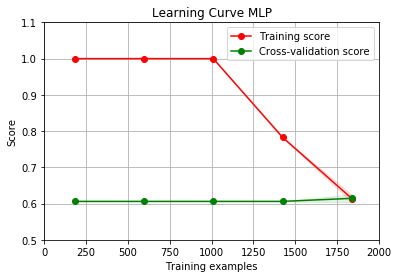

In [20]:
plot_learning_curve(cls,"Learning Curve MLP", Xtrain, Ytrain)


In [16]:

print("Training set score: %f" % cls.score(Xtrain, Ytrain))
print("Test set score: %f" % cls.score(Xtest, Ytest))


Training set score: 0.605654
Test set score: 0.605320


In [ ]:

DECISION TREE

In [29]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [32]:
#dibujar el DT 
import graphviz 
 dot_data = tree.export_graphviz(clf, out_file=None) 
 graph = graphviz.Source(dot_data) 
 graph.render("SPAM") 

'SPAM.pdf'

In [37]:
clf = tree.DecisionTreeClassifier(random_state=0,max_depth=5)

In [44]:
#We apply Grid Search to compare different scores  


clf = tree.DecisionTreeClassifier()

mi_param_grid={'max_depth':[5,10,15,20,25,30,35,40,45,50]}
migscv=GridSearchCV(clf,mi_param_grid,cv=10,verbose=2)
migscv.fit(Xtrain,Ytrain)
migscv.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................................... max_depth=5, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] .

[CV] ..................................... max_depth=35, total=   0.0s
[CV] max_depth=35 ....................................................
[CV] ..................................... max_depth=35, total=   0.0s
[CV] max_depth=35 ....................................................
[CV] ..................................... max_depth=35, total=   0.0s
[CV] max_depth=35 ....................................................
[CV] ..................................... max_depth=35, total=   0.0s
[CV] max_depth=40 ....................................................
[CV] ..................................... max_depth=40, total=   0.0s
[CV] max_depth=40 ....................................................
[CV] ..................................... max_depth=40, total=   0.0s
[CV] max_depth=40 ....................................................
[CV] ..................................... max_depth=40, total=   0.0s
[CV] max_depth=40 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.6s finished


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Iteration 1, loss = 1.51200217
Iteration 2, loss = 0.65543735
Iteration 3, loss = 0.62522789
Iteration 4, loss = 0.62557878
Iteration 5, loss = 0.60925180
Iteration 6, loss = 0.59918682
Iteration 7, loss = 0.60015809
Iteration 8, loss = 0.60228126
Iteration 9, loss = 0.62620260
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


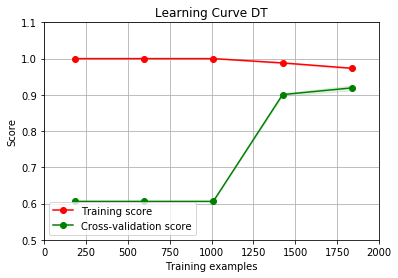

In [49]:
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=(100,4000), cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.axis([0, 2000, 0.5, 1.1])
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

clf = tree.DecisionTreeClassifier(max_depth=10,)
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
cls.fit(Xtrain, Ytrain)
plot_learning_curve(clf,"Learning Curve DT", Xtrain, Ytrain)
